# Assignment 9: Descriptors

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from scipy import ndimage

### Descriptors  
##### For the images spade ♠ (card_spade), club ♣ (card_club), heart ♥ (card_heart), and diamond ♦ (card_diamond), generate a table of features, to include the centroid, rectangular extent (width and height), area, perimeter, and circularity. You can use the *measure.label* and *measure.regionprops* functions from the skimage library.  
##### Count automatically the number of each class in the image cards. 
- ##### Design a system that can automatically classify different shapes (spade ♠, club ♣, heart ♥ and diamond ♦) in image (cards.bmp).

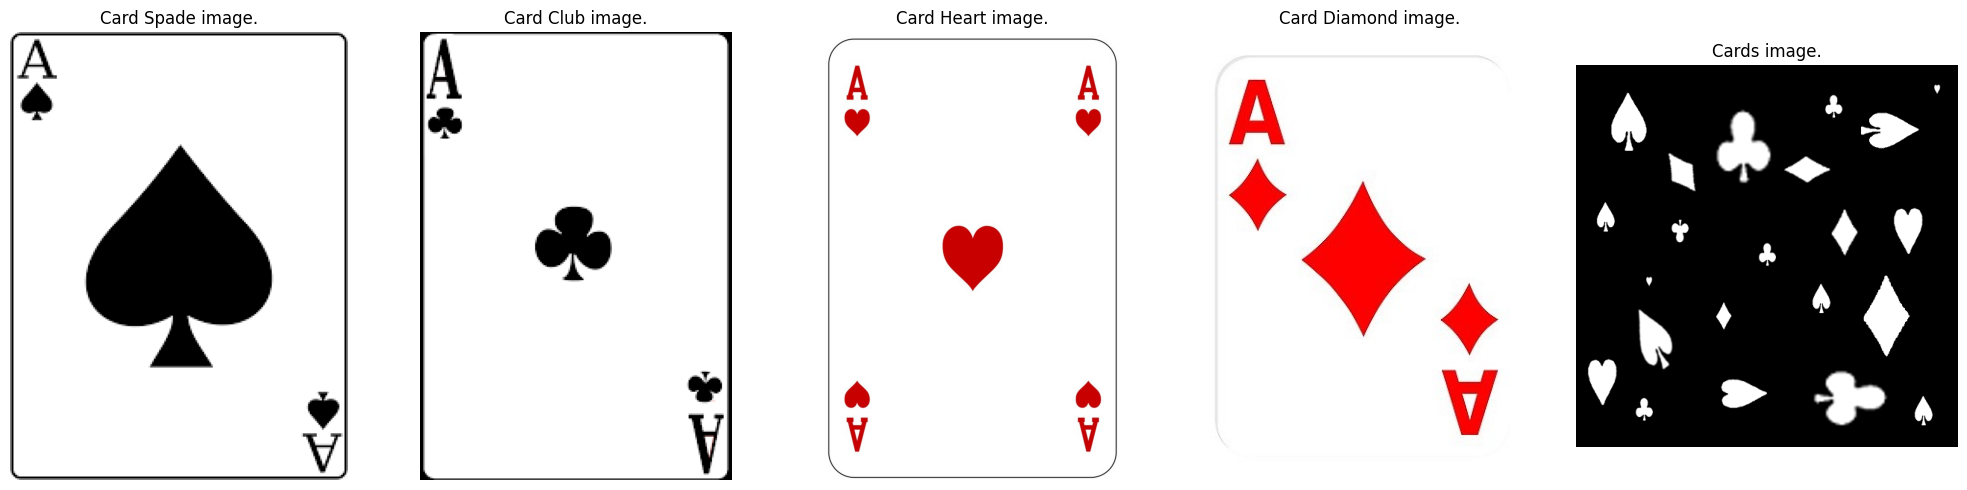

In [286]:
#Load images
card_spade = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 9 - IP\\IP8\\IP8\\spade.png")
card_club = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 9 - IP\\IP8\\IP8\\club.png")
card_heart = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 9 - IP\\IP8\\IP8\\heart.jpg")
card_diamond = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 9 - IP\\IP8\\IP8\\diamond.jpg")
image_cards = Image.open("C:\\Users\\sofyc\\OneDrive\\Desktop\\UPEC\\Pattern recognition\\assignment 9 - IP\\IP8\\IP8\\cards.bmp")

#To array
card_spade_array = np.array(card_spade)
card_club_array = np.array(card_club)
card_heart_array = np.array(card_heart)
card_diamond_array = np.array(card_diamond)
image_array_cards = np.array(image_cards)

#Plot
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(card_spade)
ax[0].set_title("Card Spade image.")
ax[0].axis('off')

ax[1].imshow(card_club)
ax[1].set_title("Card Club image.")
ax[1].axis('off')

ax[2].imshow(card_heart)
ax[2].set_title("Card Heart image.")
ax[2].axis('off')

ax[3].imshow(card_diamond)
ax[3].set_title("Card Diamond image.")
ax[3].axis('off')

ax[4].imshow(image_cards, cmap='gray')
ax[4].set_title("Cards image.")
ax[4].axis('off')

plt.tight_layout()
plt.show()

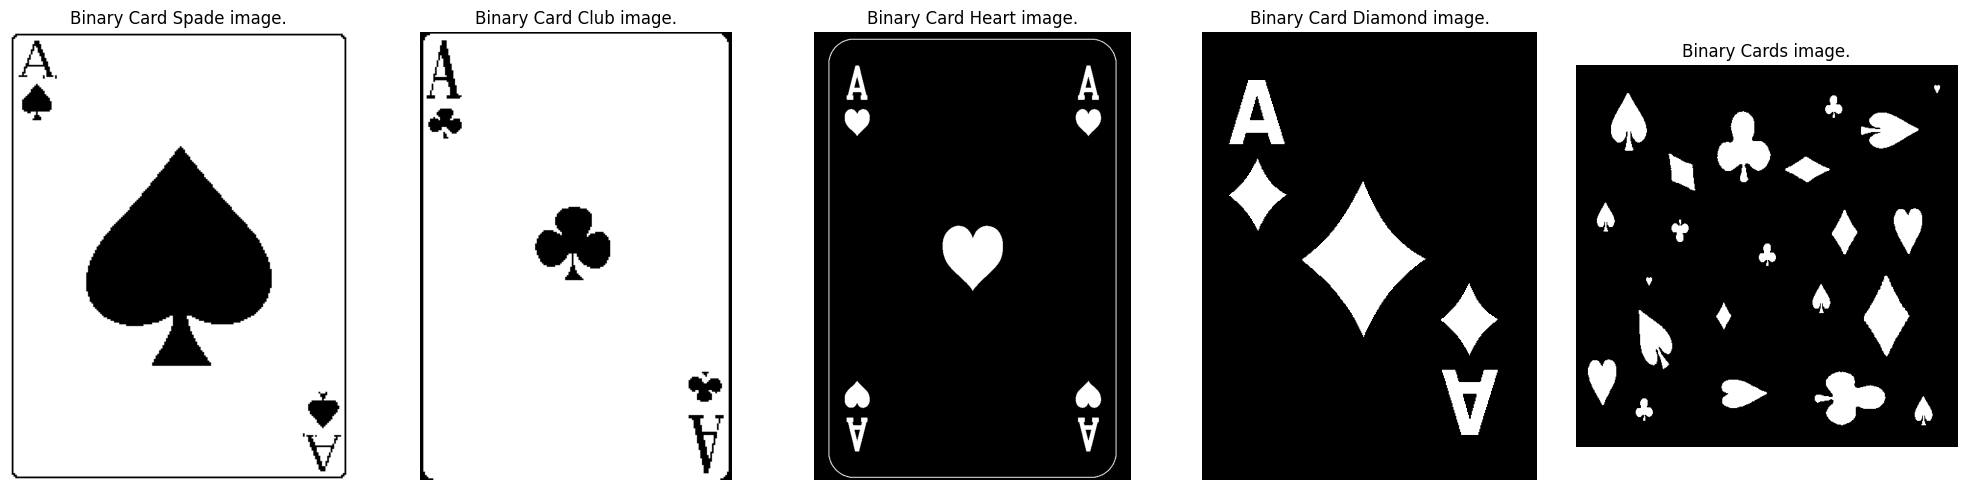

In [358]:
#Function for Otsu thresholding
def otsu_method(img):
    otsu_threshold = threshold_otsu(img)
    # Binarization based on Otsu’s method
    binary_image = (img > otsu_threshold).astype(np.uint8)
    return binary_image, otsu_threshold

#Function for Bradley-Roth Adaptive Thresholding 
def faster_bradley_threshold(image, threshold=75, window_r=5):
    percentage = threshold / 100.0
    window_diam = 2 * window_r + 1
    img = np.array(image.convert('L')).astype(np.float32)  #Converting into grayscale
    means = ndimage.uniform_filter(img, window_diam)  #Calculate local mean
    result = np.zeros(img.shape, dtype=np.uint8)  #Empty binarized image
    result[img >= percentage * means] = 255  #Adaptative thresholding
    return result

#Converting to grayscale Heart and Diamond images
card_heart_gray = rgb2gray(card_heart_array)
card_diamond_gray = rgb2gray(card_diamond_array)

#Binarization of the images
binary_card_spade = faster_bradley_threshold(card_spade, threshold=30, window_r=55)
binary_card_club = faster_bradley_threshold(card_club, threshold=10, window_r=15)
binary_card_heart, otsu_threshold_heart = otsu_method(card_heart_gray)
binary_card_diamond, otsu_threshold_diamond = otsu_method(card_diamond_gray)
binary_image_cards, otsu_threshold_cards = otsu_method(image_array_cards)

#Inversion
binary_card_spade = 1-binary_card_spade
binary_card_club = 1-binary_card_club
binary_card_diamond = 1-binary_card_diamond
binary_card_heart = 1-binary_card_heart

#Plot for check
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(binary_card_spade, cmap='gray')
ax[0].set_title("Binary Card Spade image.")
ax[0].axis('off')

ax[1].imshow(binary_card_club, cmap='gray')
ax[1].set_title("Binary Card Club image.")
ax[1].axis('off')

ax[2].imshow(binary_card_heart, cmap='gray')
ax[2].set_title("Binary Card Heart image.")
ax[2].axis('off')

ax[3].imshow(binary_card_diamond, cmap='gray')
ax[3].set_title("Binary Card Diamond image.")
ax[3].axis('off')

ax[4].imshow(binary_image_cards, cmap='gray')
ax[4].set_title("Binary Cards image.")
ax[4].axis('off')

plt.tight_layout()
plt.show()

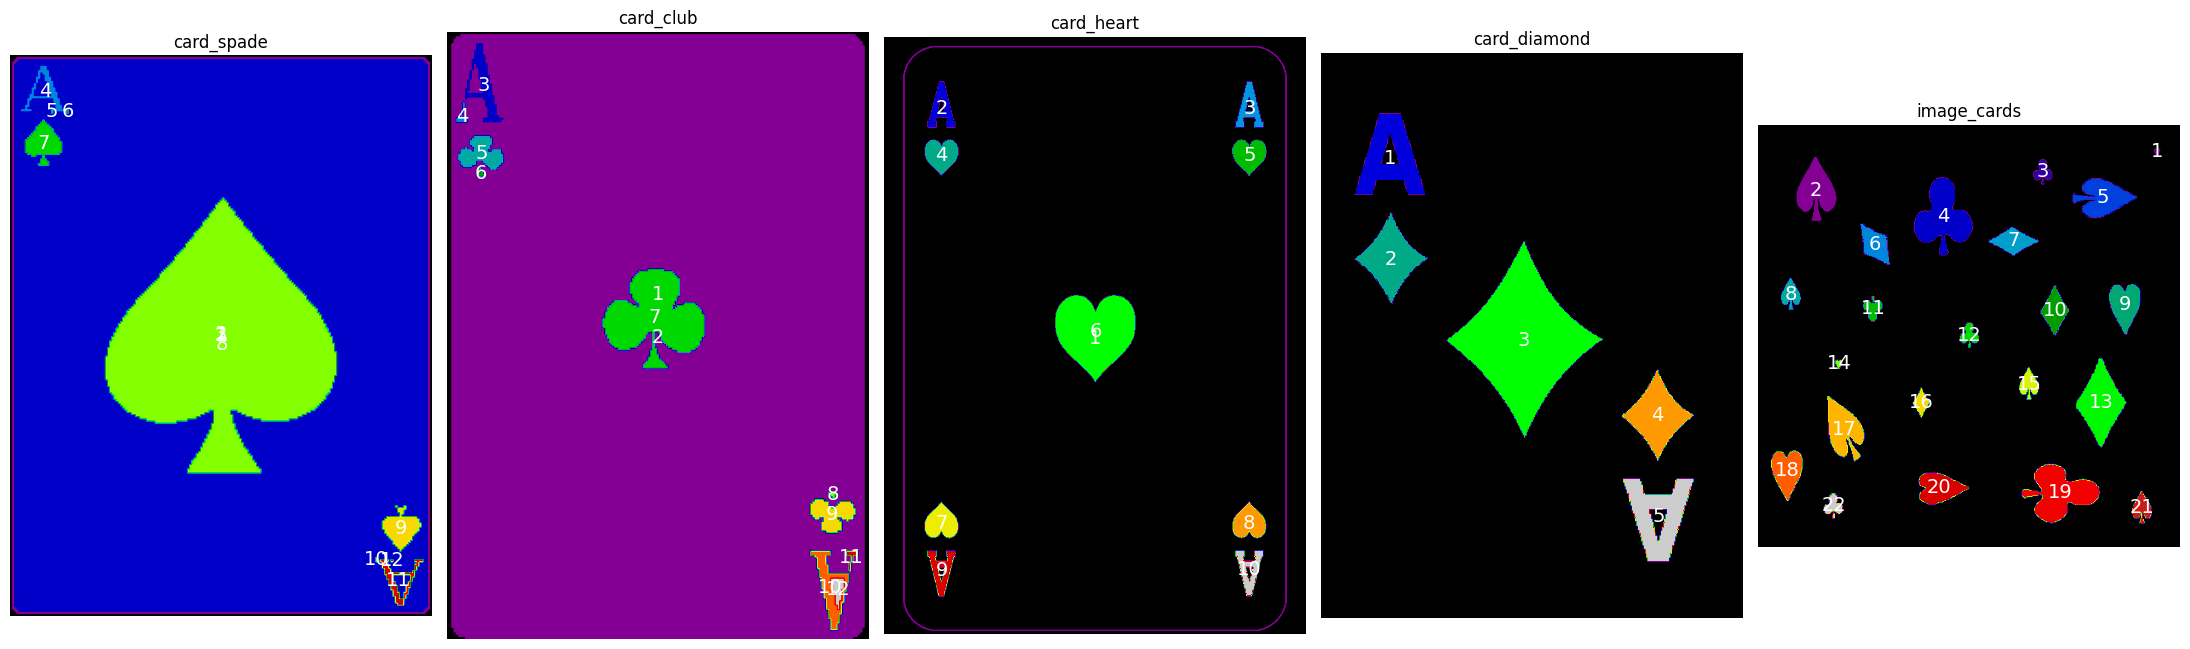

In [354]:
#Function to extract the characteristics of each object in an image
def analyze_regions(binary_img, title=""):
    #Labeling the regions in the binary image
    labeled_img = label(binary_img, connectivity=binary_img.ndim)
    props = regionprops(labeled_img)
    
    #Creating a dataframe to store the properties of each region
    data_extrcted = []
    for region in props:
        minr, minc, maxr, maxc = region.bbox
        width = maxc - minc
        height = maxr - minr
        circularity = (4 * np.pi * region.area) / (region.perimeter ** 2) if region.perimeter > 0 else 0
        data_extrcted.append([
            region.label, region.centroid, width, height, region.area, region.perimeter, circularity, region.eccentricity, region.solidity
        ])
    
    df = pd.DataFrame(data_extrcted, columns=["Label", "Centroid", "Width", "Height", "Area", "Perimeter", "Circularity", "Eccentricity", "Solidity"])

    return df, labeled_img, props

#Analyzing the regions for each individual card
df_spade, img_spade, _ = analyze_regions(binary_card_spade, "card_spade")
df_club, img_club, _ = analyze_regions(binary_card_club, "card_club")
df_heart, img_heart, _ = analyze_regions(binary_card_heart, "card_heart")
df_diamond, img_diamond, _ = analyze_regions(binary_card_diamond, "card_diamond")
df_cards, img_cards, props_cards = analyze_regions(binary_image_cards, "image_cards")

#Plot
fig, ax = plt.subplots(1, 5, figsize=(22, 15))
images = [img_spade, img_club, img_heart, img_diamond, img_cards]
titles = ["card_spade", "card_club", "card_heart", "card_diamond", "image_cards"]

#Function to plot all images in a single row
def plot_labeled_image(ax, img, title, df):
    ax.imshow(img, cmap='nipy_spectral')
    ax.set_title(title)
    ax.axis('off')
    
    #Plot centroids with labels
    for _, row in df.iterrows():
        centroid = row["Centroid"]
        ax.scatter(centroid[1], centroid[0], color='none', s=50, marker='x')
        ax.text(centroid[1], centroid[0], str(row["Label"]),
                color='white', fontsize=14, ha='center', va='center',
                bbox=dict(facecolor='none', edgecolor='none'))

#Application of the function to each subplot
for i in range(5):
    plot_labeled_image(ax[i], images[i], titles[i], eval(f'df_{titles[i].split("_")[1]}'))

plt.tight_layout()
plt.show()

In [359]:
df_spade  #interested labels: 1,2,3,7,8,9

,Label,Centroid,Width,Height,Area,Perimeter,Circularity,Eccentricity,Solidity
0,1,"(129.0, 97.0)",195,259,916.0,915.313708,0.013739,0.591846,0.018137
1,2,"(129.0, 97.0)",193,257,896.0,896.000000,0.014025,0.592447,0.018069
2,3,"(128.28522294254466, 96.94707279655564)",191,255,40414.0,1717.755447,0.172115,0.671283,0.829976
3,4,"(16.09090909090909, 15.757575757575758)",20,21,99.0,83.763456,0.177311,0.601884,0.400810
4,5,"(25.5, 19.0)",1,2,2.0,0.000000,0.000000,1.000000,1.000000
5,6,"(25.5, 26.0)",1,2,2.0,0.000000,0.000000,1.000000,1.000000
6,7,"(40.15686274509804, 14.946078431372548)",17,21,204.0,64.148232,0.622975,0.360400,0.853556
7,8,"(132.83600573588842, 97.30191630817365)",107,127,7671.0,435.487373,0.508289,0.320442,0.879904
8,9,"(218.06965174129354, 180.2636815920398)",18,21,201.0,60.941125,0.680119,0.235977,0.837500
9,10,"(232.5, 169.0)",1,2,2.0,0.000000,0.000000,1.000000,1.000000


In [360]:
df_club #interested labels: 5,7,9

,Label,Centroid,Width,Height,Area,Perimeter,Circularity,Eccentricity,Solidity
0,1,"(115.80660015349194, 93.14121258633922)",187,269,1303.0,1268.970563,0.010168,0.097578,0.025903
1,2,"(134.57407052714464, 92.94754091383089)",183,268,46989.0,1563.706674,0.241488,0.734950,0.958822
2,3,"(23.190721649484537, 15.75257731958763)",17,35,194.0,114.491378,0.185980,0.956750,0.557471
3,4,"(36.64705882352941, 6.235294117647059)",5,9,17.0,13.621320,1.151384,0.909797,0.586207
4,5,"(53.4331550802139, 14.668449197860962)",20,15,187.0,70.769553,0.469201,0.686313,0.809524
5,6,"(61.875, 14.625)",3,4,8.0,7.414214,1.828815,0.851469,0.888889
6,7,"(125.79195804195804, 91.5472027972028)",45,44,1144.0,205.166522,0.341525,0.457812,0.793343
7,8,"(204.57142857142858, 170.57142857142858)",4,3,7.0,6.621320,2.006405,0.643079,0.875000
8,9,"(213.2712765957447, 170.18617021276594)",20,15,188.0,69.941125,0.482950,0.695480,0.810345
9,10,"(245.63131313131314, 169.27272727272728)",17,35,198.0,115.041631,0.188003,0.954701,0.568966


In [361]:
df_heart #interested labels: 4,5,6,7,8

,Label,Centroid,Width,Height,Area,Perimeter,Circularity,Eccentricity,Solidity
0,1,"(499.50768491834776, 349.12247838616713)",636,970,6246.0,6081.492424,0.002122,0.683339,0.010166
1,2,"(117.63003663003663, 94.8882783882784)",46,76,1638.0,323.438600,0.196761,0.848763,0.726708
2,3,"(117.56375838926175, 605.4752898108603)",46,76,1639.0,323.195959,0.197177,0.849769,0.724580
3,4,"(194.63093145869948, 94.90597539543057)",55,60,2276.0,196.450793,0.741096,0.271510,0.944398
4,5,"(194.6896853146853, 605.5065559440559)",56,60,2288.0,198.622366,0.728802,0.270743,0.942728
5,6,"(487.18375123847267, 350.2515814343419)",133,144,13121.0,480.399062,0.714451,0.277628,0.950177
6,7,"(805.2672527472528, 94.80703296703297)",55,60,2275.0,195.622366,0.747058,0.272032,0.949896
7,8,"(805.2938347179711, 605.3419326628772)",56,60,2287.0,197.450793,0.737154,0.291563,0.939992
8,9,"(883.3778461538461, 94.74953846153846)",47,75,1625.0,324.852814,0.193504,0.845098,0.719663
9,10,"(883.1563076923077, 605.4553846153846)",46,75,1625.0,322.367532,0.196499,0.846579,0.724476


In [362]:
df_diamond #interested labels: 2,3,4

,Label,Centroid,Width,Height,Area,Perimeter,Circularity,Eccentricity,Solidity
0,1,"(86.32112815437902, 56.646214745175655)",58,67,2021.0,315.130988,0.255737,0.670195,0.778206
1,2,"(169.51771871539313, 57.06976744186046)",60,75,1806.0,199.492424,0.570262,0.615033,0.796999
2,3,"(236.82435989471165, 166.74551328068915)",129,162,8358.0,435.340187,0.554185,0.613030,0.795470
3,4,"(299.3494771601541, 277.50082553659877)",59,75,1817.0,196.735065,0.589931,0.607337,0.811161
4,5,"(382.2451899358658, 278.5362604834731)",58,68,2027.0,319.338095,0.249783,0.674397,0.768385


In [363]:
df_cards
#labels spade: 2,5,8,15,17,21
#labels club: 3,4,11,12,19,22
#labels heart: 1,9,14,18,20
#labels diamond: 6,7,10,13,16

,Label,Centroid,Width,Height,Area,Perimeter,Circularity,Eccentricity,Solidity
0,1,"(32.06666666666667, 483.5)",8,11,60.0,29.727922,0.853163,0.678192,0.882353
1,2,"(79.39538171536286, 69.98633364750236)",48,77,2122.0,269.865007,0.366153,0.716747,0.886383
2,3,"(56.62942779291553, 344.9509536784741)",23,30,367.0,100.597980,0.455719,0.610720,0.771008
3,4,"(111.25471963933502, 223.89320935474782)",72,95,3549.0,338.149278,0.390031,0.637071,0.792541
4,5,"(87.98633364750236, 417.6046182846371)",77,48,2122.0,269.865007,0.366153,0.716747,0.886383
5,6,"(144.56177606177607, 141.66409266409266)",36,49,1036.0,147.154329,0.601206,0.829407,0.895419
6,7,"(140.49514563106797, 309.05728155339807)",60,34,1030.0,147.095454,0.598203,0.827943,0.903509
7,8,"(205.27169811320755, 39.25471698113208)",24,39,530.0,132.361436,0.380157,0.724812,0.861789
8,9,"(217.29719137818418, 444.8458523840627)",38,61,1531.0,175.438600,0.625079,0.746246,0.939264
9,10,"(224.94271844660193, 359.49514563106794)",34,60,1030.0,147.095454,0.598203,0.827943,0.903509


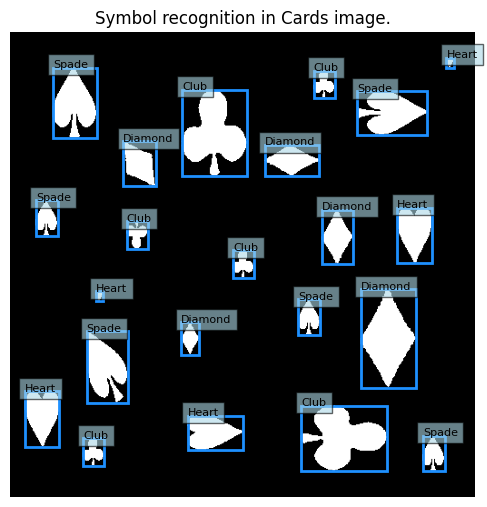

In [365]:
#Function to classify the symbols' labels
def classify_label(region):
    #Club classification
    if 0.77 <= region.solidity <= 0.81:
        #range taken from cards and club
        return "Club"
    
    #Hheart classification
    if 0.88 <= region.solidity <= 0.95 and (0.73 <= region.eccentricity <= 0.76 or 0.66 <= region.eccentricity <= 0.68): 
       #range taken from cards and heart    #range taken from cards (bigger heart)    #range taken from cards and heart (smaller heart)
        return "Heart"

    #Spade classification
    elif 0.82 <= region.solidity <= 0.89: #range taken from cards and spade
        return "Spade"
    
    #Diamond classification
    else: #remaining symbols
        return "Diamond"

#Classify each region based on its properties
df_cards["Symbol"] = df_cards.apply(lambda row: classify_label(props_cards[int(row["Label"]) - 1]), axis=1)

#Count the occurrences
symbol_counts = df_cards["Symbol"].value_counts().reset_index().rename(columns={"index": "Symbol", "Symbol": "Count"})

#Display the card with bounding boxes and labels
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(binary_image_cards, cmap='gray')
ax.set_title("Symbol recognition in Cards image.")
ax.axis('off')

#Draw bounding boxes and labels for each detected prop
for region in props_cards:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='dodgerblue', linewidth=2)
    ax.add_patch(rect)
    ax.text(minc, minr, classify_label(region), bbox=dict(facecolor='lightblue', alpha=0.6), fontsize=8, color='black')

plt.show()

In [349]:
#Take a look
symbol_counts

,Count,count
0,Spade,6
1,Club,6
2,Heart,5
3,Diamond,5


## References
- https://stackoverflow.com/questions/33091755/bradley-roth-adaptive-thresholding-algorithm-how-do-i-get-better-performance